In [1]:
import clustertools as ctools
import numpy as np
from astropy.table import QTable
import matplotlib.pyplot as plt

# Loading and Advancing

**Loading**


To manually load a snapshot of a cluster, simply read in the file via your preferred method, declare a StarCluster with the appropriate units and origin, and add stars. For example, consider a snapshot of a star cluster in a file named 00000.dat with columns of stellar mass, position (x,y,z) in pc , and velocity (vx,vy,vz) in km/s. The origin of the system is the cluster's centre. A StarCluster can be initialized via:

In [2]:
m,x,y,z,vx,vy,vz=np.loadtxt('00000.dat',unpack=True)
cluster=ctools.StarCluster(units='pckms',origin='cluster')
cluster.add_stars(x,y,z,vx,vy,vz,m)

The snapshot can be quickly viewed using the ``starplot`` function

0

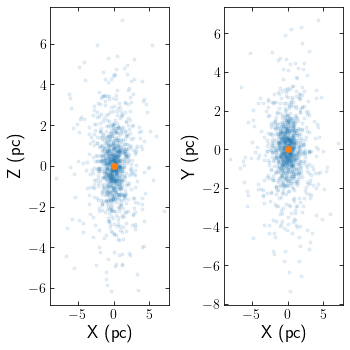

In [3]:
ctools.starplot(cluster)

When manually setting up a cluster, key cluster parameters will not be calculated unless the function ``key_params()`` is called. 

In [4]:
cluster.analyze()

In [5]:
print('Total Number of Stars = ',cluster.ntot)
print('Total Mass = ',cluster.mtot)
print('Mean Mass = ',cluster.mmean)
print('Mean Radius = ',cluster.rmean)
print('Maximum Radius = ',cluster.rmax)
print('Half-mass radius = ',cluster.rm)
print('Projected Half-mass radius = ',cluster.rmpro)
print('10% Lagrange radius = ',cluster.r10)
print('Projected 10% Lagrange radius = ',cluster.r10pro)

Total Number of Stars =  1000
Total Mass =  349.28177633974826
Mean Mass =  0.3492817763397483
Mean Radius =  2.4510248375725765
Maximum Radius =  8.324259111087308
Half-mass radius =  1.961786912943431
Projected Half-mass radius =  1.5030278513713957
10% Lagrange radius =  0.733265989776171
Projected 10% Lagrange radius =  0.49097752209716733


Alternatively, several functions have been written to more easily load a snapshot of a cluster.  For example, snapshot 00000.dat could more easily be loaded via:

In [6]:
cluster=ctools.load_cluster('snapshot',filename='00000.dat',units='pckms',origin='cluster')

When using load_cluster, key cluster parameters are instantly calculated.

In [7]:
print('Total Number of Stars = ',cluster.ntot)
print('Total Mass = ',cluster.mtot)
print('Mean Mass = ',cluster.mmean)
print('Mean Radius = ',cluster.rmean)
print('Maximum Radius = ',cluster.rmax)
print('Half-mass radius = ',cluster.rm)
print('Projected Half-mass radius = ',cluster.rmpro)
print('10% Lagrange radius = ',cluster.r10)
print('Projected 10% Lagrange radius = ',cluster.r10pro)


Total Number of Stars =  1000
Total Mass =  349.28177633974826
Mean Mass =  0.3492817763397483
Mean Radius =  2.4510248375725765
Maximum Radius =  8.324259111087308
Half-mass radius =  1.961786912943431
Projected Half-mass radius =  1.5030278513713957
10% Lagrange radius =  0.733265989776171
Projected 10% Lagrange radius =  0.49097752209716733


If the columns in your snapshot do not have the format mass,x,y,z,vx,vy,vz,i_d,kw, then use ``col_names`` and ``col_nums`` when using ``load_cluster``

In [8]:
cluster=ctools.load_cluster('snapshot',filename='00000.dat',units='pckms',origin='cluster',
                            col_names=["m", "x", "y", "z", "vx", "vy", "vz"],col_nums=[0, 1, 2, 3, 4, 5, 6],)

If the orbital information of your simulated cluster is known, and is contained in a file with columns of time, x, y, z, vx, vy, vz then either the filename can be given to the ``load_cluster`` command using the ``ofilename`` flag: 

In [9]:
cluster=ctools.load_cluster('snapshot',filename='00000.dat',units='pckms',origin='cluster',
                            col_names=["m", "x", "y", "z", "vx", "vy", "vz"],
                            col_nums=[0, 1, 2, 3, 4, 5, 6], ofilename='orbit.dat')

0.0 False


Alternatively, orbital information can be read in and added separately. If the units in ``orbit.dat`` are not the same as ``cluster.units``, one can use the ``ounits`` flag in ``add_orbit``. They will be converted to cluster.units.

In [10]:
t,xgc,ygc,zgc,vxgc,vygc,vzgc=np.loadtxt('orbit.dat',unpack=True)
cluster.tphys=t
cluster.add_orbit(xgc,ygc,zgc,vxgc,vygc,vzgc,ounits='kpckms')
print(cluster.tphys,cluster.xgc,cluster.ygc,cluster.zgc,cluster.vxgc,cluster.vygc,cluster.vzgc)

[ 0. 10.] [10000.     0.] [    0. 10000.] [0. 0.] [  0. 220.] [220.   0.] [0. 0.]


Functions have also been written to automatically load snapshots from the commonly used codes NBODY6 and gyrfalcon. To load an NBODY6 snapshot from OUT33 and OUT9:

0

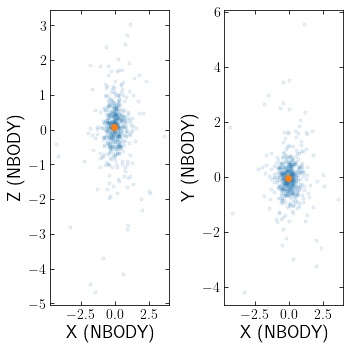

In [11]:
cluster=ctools.load_cluster('nbody6',wdir='./nbody6_sim/')
ctools.starplot(cluster)

``clustertools`` knows that when reading in NBODY6 snapshots, the units will be ``'nbody'`` units and the origin will be ``'cluster'``. For an NBODY6 simulation with stellar evolution, fort.82 and fort.83 will also be read.

Finally, for a gyrfalcon simulation. the first cluster snapshot can be read in using:

0

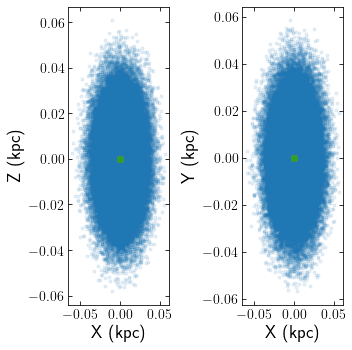

In [12]:
cluster=ctools.load_cluster('gyrfalcon',filename='cluster.nemo.dat')
ctools.starplot(cluster)

Note that since gyrfalcon does not have a default output filename like NBODY6, the filename must be specifified. Furthermore, gyrfalcon's output is a binary file that must be converted to ascii using NEMO's ``s2a`` command before it can be read in by ``clustertools``.

Finally, clusters can be read in from astropy tables aswell. The below example reads in an N-body simulation of Pal 5 in units of ``kpckms`` in Galactocentric coordinates. The snapshot corresponds to Pal 5's most recent pericentre pass.

/usr/local/lib/python3.9/site-packages/astropy/io/ascii/ecsv.py:133: AstropyWarning: file looks like ECSV format but PyYAML is not installed so it cannot be parsed as ECSV
  warnings.warn("file looks like ECSV format but PyYAML is not installed "



0

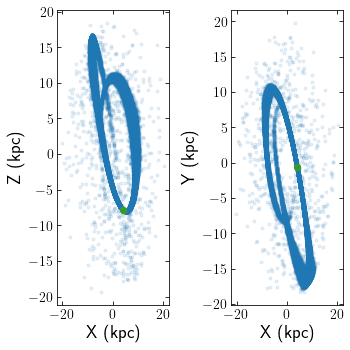

In [13]:
data = QTable.read("pal5_rp.dat", format="ascii")
cluster = ctools.load_cluster('astropy_table',particles=data, units='kpckms',origin='galaxy')
ctools.starplot(cluster)

**Advancing**

In most cases, it is desirable to read more than just the first timestep of a simulation. ``clustertools`` has been set up to easily read in a snapshot, calculate key cluster parameters, and then advance to the next snapshot. An advance can easily be first reading in the cluster:

In [14]:
cluster=ctools.load_cluster(ctype='nbody6',wdir='./nbody6_sim/')


``advance_cluster`` will then move to the next timestep. One can then keep track of properties like time and mass to follow a cluster's evolution.

In [15]:
t=[]
m=[]

while cluster.ntot>0:
    cluster.to_pckms()
    t.append(cluster.tphys)
    m.append(np.sum(cluster.m))
    cluster=ctools.advance_cluster(cluster,wdir='./nbody6_sim/')


Text(0, 0.5, '$ \\rm Mass \\ (M_{\\odot})$')

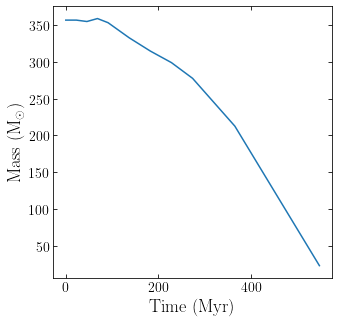

In [16]:
plt.plot(t,m)
plt.xlabel(r'$ \rm Time \ (Myr)$')
plt.ylabel(r'$ \rm Mass \ (M_{\odot})$')

For the previous case above where the first snapshot had a filename of 00000.dat, ``advance_cluster`` will look for a filename titled 00001.dat. If your filenames have a different naming convention, just specify some of the keyword arguments when loading the first snapshot. For example, if your snapshots are named snap_cluster_001.txt and snap_cluster_002.txt, they can be loaded via:

In [17]:
cluster=ctools.load_cluster('snapshot',snapbase='snap_cluster_',nsnap=1,nzfill=3,snapend='.txt',snapdir='',units='pckms',origin='cluster')
cluster=ctools.advance_cluster(cluster)